In [ ]:
!pip install kaggle tensorflow matplotlib numpy scikit-learn opencv-python

Dataset Used : https://www.kaggle.com/datasets/imsparsh/flowers-dataset?

In [40]:
from google.colab import files
import os

print("Upload your kaggle.json file")
uploaded = files.upload()

os.makedirs("/root/.kaggle", exist_ok=True)
for fname in uploaded.keys():
    os.rename(fname, "/root/.kaggle/kaggle.json")

!chmod 600 /root/.kaggle/kaggle.json


Upload your kaggle.json file


Saving kaggle.json to kaggle.json


In [41]:
# Download Flowers Dataset directly from Kaggle
!kaggle datasets download -d imsparsh/flowers-dataset

# Unzip dataset
import zipfile
with zipfile.ZipFile("flowers-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("flowers")

dataset_path = "flowers/flowers"
print("Dataset extracted at:", dataset_path)


Dataset URL: https://www.kaggle.com/datasets/imsparsh/flowers-dataset
License(s): CC0-1.0
flowers-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset extracted at: flowers/flowers


In [42]:
import os

dataset_path = None

for root, dirs, files in os.walk("flowers"):
    # Look for folder containing flower class names
    if "daisy" in dirs and "rose" in dirs and "sunflower" in dirs:
        dataset_path = root
        break

print("✅ Correct dataset path detected:", dataset_path)
print("✅ Classes found:", os.listdir(dataset_path))


✅ Correct dataset path detected: flowers/train
✅ Classes found: ['tulip', 'daisy', 'rose', 'dandelion', 'sunflower']


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    zoom_range=0.2,
    validation_split=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2198 images belonging to 5 classes.
Found 548 images belonging to 5 classes.


In [44]:
num_classes = train_gen.num_classes
print("Number of classes:", num_classes)


Number of classes: 5


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size,img_size,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(0.0005),
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
epochs = 20

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.3199 - loss: 1.5339 - val_accuracy: 0.4507 - val_loss: 1.2707
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5035 - loss: 1.1984 - val_accuracy: 0.5036 - val_loss: 1.1727
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5216 - loss: 1.1371 - val_accuracy: 0.5474 - val_loss: 1.0764
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.6090 - loss: 1.0123 - val_accuracy: 0.5821 - val_loss: 1.0352
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6280 - loss: 0.9520 - val_accuracy: 0.5620 - val_loss: 1.1401
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6469 - loss: 0.9286 - val_accuracy: 0.6350 - val_loss: 0.9376
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6724 - loss: 0.8485 - val_accuracy: 0.6679 - val_loss: 0.8708
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6923 - loss: 0.8275 - val_accuracy: 0.6752 - val_loss:

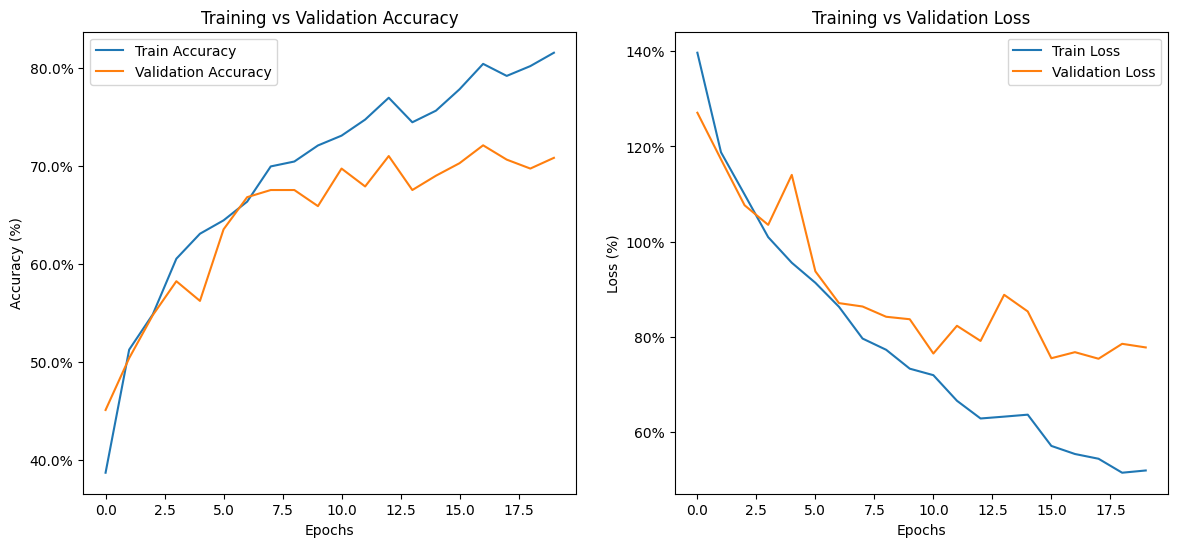

Final Training Accuracy: 81.53%
Final Validation Accuracy: 70.80%
Final Training Loss: 51.93%
Final Validation Loss: 77.78%


In [47]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (%)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.legend()

plt.show()

final_train_acc = train_acc[-1] * 100
final_val_acc = val_acc[-1] * 100
final_train_loss = train_loss[-1] * 100
final_val_loss = val_loss[-1] * 100

print(f"Final Training Accuracy: {final_train_acc:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")
print(f"Final Training Loss: {final_train_loss:.2f}%")
print(f"Final Validation Loss: {final_val_loss:.2f}%")


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 418ms/step


<Figure size 800x800 with 0 Axes>

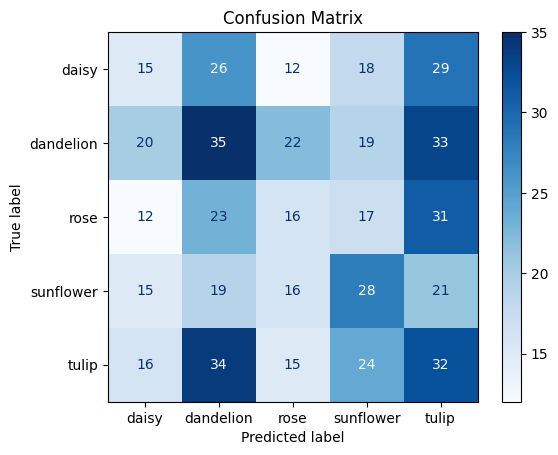

In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = val_gen.classes
y_pred_prob = model.predict(val_gen)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=train_gen.class_indices.keys())

plt.figure(figsize=(8,8))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Upload an image to classify:


Saving Daisy.jpg to Daisy (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


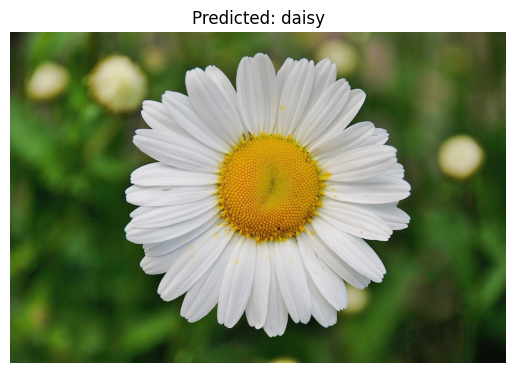

In [52]:
import cv2
from google.colab import files

print("Upload an image to classify:")
uploaded = files.upload()

for fn in uploaded.keys():

    # Load image
    img = cv2.imread(fn)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Preprocess
    img_resized = cv2.resize(img_rgb, (img_size, img_size))
    img_array = np.expand_dims(img_resized / 255.0, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_id = np.argmax(prediction)
    label = list(train_gen.class_indices.keys())[class_id]

    # Show result
    plt.imshow(img_rgb)
    plt.title("Predicted: " + label)
    plt.axis('off')
    plt.show()
